# Exploratory Data Analysis

This notebook is made for exploring the data and analyzing it.

## Imports

Imports that we need to take care of.

In [1]:
import pandas as pd
import re
from itertools import combinations
import matplotlib.pyplot as plt

## Loading the data

Let's load the data into memory.

In [2]:
dfs = {}
datasets = ["data/2018/84468NED_UntypedDataSet_17032023_184722.csv", "data/2017/83901NED_UntypedDataSet_17032023_184829.csv", "data/2016/83903NED_UntypedDataSet_17032023_184919.csv"]


for dataset in datasets:
    findings = re.findall(r"(201\d)", dataset)
    year = findings[0]
    df = pd.read_csv(filepath_or_buffer=dataset, delimiter=";")
    relative_columns = df.columns.to_list()[-5:] #there are five relative columns, skip these for now
    print(relative_columns)
    df = df.drop(columns=relative_columns)
    dfs[year] = df

['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']


Let's check if we could join them easily by comparing if they have the same headers.

In [3]:
for comb in combinations(dfs.keys(), r=2):
    year_0 = comb[0]
    year_1 = comb[1]
    if ((dfs[year_0].columns == dfs[year_1].columns).all() == False):
        print('Problem with combination', comb, ", not all columns match.")

Let's inspect if there is a data-related column. If there is, we can just join the table, else we need to make one to seperate the data of 2016, 2017, 2018 by.

In [4]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      16771 non-null  int64 
 1   WijkenEnBuurten                         16771 non-null  object
 2   Gemeentenaam_1                          16771 non-null  object
 3   SoortRegio_2                            16771 non-null  object
 4   Codering_3                              16771 non-null  object
 5   Indelingswijziging_4                    16771 non-null  object
 6   AantalInwoners_5                        16771 non-null  int64 
 7   TotaalVermogenVernielingEnGeweld_6      16771 non-null  object
 8   TotaalVermogensmisdrijven_7             16771 non-null  object
 9   TotaalDiefstal_8                        16771 non-null  object
 10  Fietsendiefstal_9                       16771 non-null  object
 11  Di

--> does not seem like it, so let's make a year column.

In [5]:
dfs["2018"].columns

Index(['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3',
       'Indelingswijziging_4', 'AantalInwoners_5',
       'TotaalVermogenVernielingEnGeweld_6', 'TotaalVermogensmisdrijven_7',
       'TotaalDiefstal_8', 'Fietsendiefstal_9',
       'DiefstalOverigeVervoermiddelen_10',
       'DiefstalUitVanafVervoermiddelen_11',
       'ZakkenrollerijStraatroofEnBeroving_12',
       'TotaalDiefstalUitWoningSchuurED_13',
       'DiefstalUitNietResidentieleGebouwen_14', 'OverigeDiefstalInbraak_15',
       'OverigeVermogensmisdrijven_16', 'TotaalVernielingTegenOpenbareOrde_17',
       'TotaalVernieling_18', 'VernielingAanAuto_19', 'OverigeVernieling_20',
       'OverigeVernielingTegenOpenbareOrde_21',
       'TotaalGeweldsEnSeksueleMisdrijven_22', 'Mishandeling_23',
       'BedreigingEnStalking_24', 'OverigeGeweldsEnSeksueleMisdrijven_25'],
      dtype='object')

It seems that some columns have _numberOfCol at the end. Let's clean that.

In [6]:
columns = dfs["2018"].columns.to_list()
cleaned_columns = []
for col in columns:
    cleaned_col = re.sub(r"(_\d+)", repl="", string=col)
    #r"(_+\d)" --> regular expression that looks for an underscore with after that at least one digit.
    cleaned_columns.append(cleaned_col)

#Go over every dataframe and change the column names
column_renamer = {columns[i]: cleaned_columns[i] for i in range(len(cleaned_columns))}
for key in dfs.keys():
    dfs[key] = dfs[key].rename(columns=column_renamer)

In [7]:
for key in dfs.keys():
    df = dfs[key]
    df["year"] = [year for _ in range(len(df))]

Let's create a big dataframe which has all data together

In [8]:
for key in dfs.keys():
    df = dfs[key]
    df = df.reset_index()
    df["ID"] = [str(id)+"_"+key for id in df["ID"].to_list()]
    dfs[key] = df

df_all = pd.DataFrame(columns=dfs["2018"].columns)

for key in dfs.keys():
    df_all = pd.concat([df_all, dfs[key]])
    dfs[key] = dfs[key].drop(columns="ID")

df_all = df_all.drop(columns="index")

In [9]:
df_all

,ID,WijkenEnBuurten,Gemeentenaam,SoortRegio,Codering,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,...,TotaalVernielingTegenOpenbareOrde,TotaalVernieling,VernielingAanAuto,OverigeVernieling,OverigeVernielingTegenOpenbareOrde,TotaalGeweldsEnSeksueleMisdrijven,Mishandeling,BedreigingEnStalking,OverigeGeweldsEnSeksueleMisdrijven,year
0,0_2018,GM1680,Aa en Hunze,Gemeente,GM1680,.,25390,423,284,199,...,73,59,14,45,14,66,26,23,17,2016
1,1_2018,WK168000,Aa en Hunze,Wijk,WK168000,1,3560,38,22,16,...,9,8,1,7,1,7,3,3,1,2016
2,2_2018,BU16800000,Aa en Hunze,Buurt,BU16800000,1,3415,37,21,15,...,9,8,1,7,1,7,3,3,1,2016
3,3_2018,BU16800009,Aa en Hunze,Buurt,BU16800009,1,145,1,1,1,...,0,0,0,0,0,0,0,0,0,2016
4,4_2018,WK168001,Aa en Hunze,Wijk,WK168001,1,1430,19,16,12,...,1,1,0,1,0,2,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188,16188_2016,BU01935150,Zwolle,Buurt,BU01935150,1,3199,33,20,13,...,9,9,2,7,0,4,0,4,0,2016
16189,16189_2016,BU01935160,Zwolle,Buurt,BU01935160,1,72,3,3,2,...,0,0,0,0,0,0,0,0,0,2016
16190,16190_2016,WK019352,Zwolle,Wijk,WK019352,1,867,17,9,6,...,6,6,1,5,0,2,0,0,2,2016
16191,16191_2016,BU01935200,Zwolle,Buurt,BU01935200,1,386,8,2,2,...,6,6,1,5,0,0,0,0,0,2016


Now, let's save it and try to load it (checking if it works).

In [10]:
df_all.to_csv(path_or_buf="data/all_data.csv", sep=";", index=False)

In [11]:
df_all = pd.read_csv(filepath_or_buffer="data/all_data.csv", delimiter=";")

## Visualizations

### Let's do so EDA when considering all datasets.

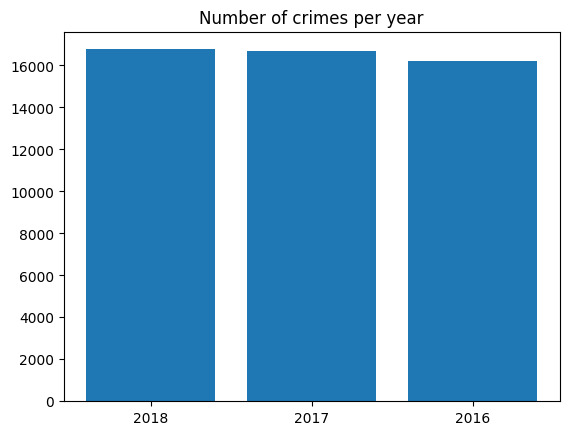

In [12]:
number_of_crimes = [len(dfs[x]) for x in dfs.keys()]
years = list(dfs.keys())

plt.bar(x=years, height=number_of_crimes)
plt.title("Number of crimes per year")
plt.show()

In [13]:
dfs["2018"].columns

Index(['index', 'WijkenEnBuurten', 'Gemeentenaam', 'SoortRegio', 'Codering',
       'Indelingswijziging', 'AantalInwoners',
       'TotaalVermogenVernielingEnGeweld', 'TotaalVermogensmisdrijven',
       'TotaalDiefstal', 'Fietsendiefstal', 'DiefstalOverigeVervoermiddelen',
       'DiefstalUitVanafVervoermiddelen', 'ZakkenrollerijStraatroofEnBeroving',
       'TotaalDiefstalUitWoningSchuurED',
       'DiefstalUitNietResidentieleGebouwen', 'OverigeDiefstalInbraak',
       'OverigeVermogensmisdrijven', 'TotaalVernielingTegenOpenbareOrde',
       'TotaalVernieling', 'VernielingAanAuto', 'OverigeVernieling',
       'OverigeVernielingTegenOpenbareOrde',
       'TotaalGeweldsEnSeksueleMisdrijven', 'Mishandeling',
       'BedreigingEnStalking', 'OverigeGeweldsEnSeksueleMisdrijven', 'year'],
      dtype='object')

In [14]:
def fix_zeros(dataframes: dict[str, pd.DataFrame], key: str) -> dict[str, pd.DataFrame]:
    for dataframe in dfs.values():
        dataframe[key] = dataframe[key].replace(r'(\s+)', "", regex=True) #replace all spaces with nothing
        dataframe[key] = dataframe[key].replace(r'(\.)', "0", regex=True) #replace the dots with 0
        dataframe[key] = dataframe[key].astype(int)

    return dfs

In [15]:
#CBS used . instead of 0s and strings instead of integers when loading data
#--> fixing it here
dfs = fix_zeros(dataframes = dfs, key = "TotaalVermogenVernielingEnGeweld")

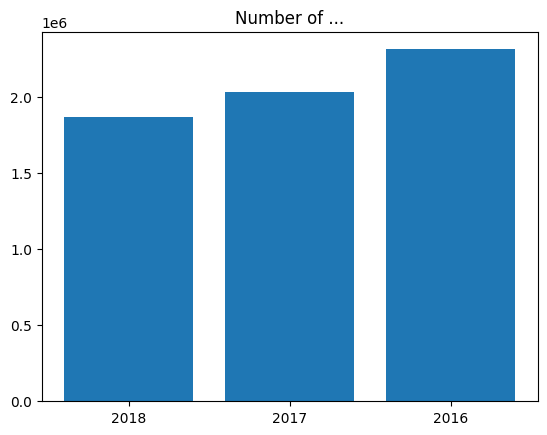

In [16]:
number_of_crimes = [sum(dfs[x]["TotaalVermogenVernielingEnGeweld"]) for x in dfs.keys()]
years = list(dfs.keys())

plt.bar(x=years, height=number_of_crimes)
plt.title("Number of ...") #TODO: fix title
plt.show()

### Let's do so EDA when considering each dataset separately.